In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#illustrative video https://www.youtube.com/watch?v=aUkBa1zMKv4

## **The inputs of our System**

In [ ]:
#tragectory length
TLen = 100

HiddenState = np.zeros(TLen)
Observation = np.zeros(TLen)


#Initial values for (X)
Init = 0

#The error (variance)of the model
ModelVar = 0.3

#The error (variance)of the observation i.e measurement
ObsVar = 0.5
"""
State model which present the model equation system as follow:
    NextState = State/2+ (25*State)/(1+State*State)...
                          +8*cos(1.2*Time)+ model noise;
We can notice that the equaitons are nonlinear which make Kálmán filter unfeasible
we will use the model function to convert our input to the state realm
"""

def Model(x,Time):
  return 5/(1+x**3)+ x/2+(25*x)/(1+x**2) + 8*np.cos(1.2*Time) + np.random.randn()*ModelVar

'''
Observation measurement which present the measurement equation as follow:
    Observe= (State*State)/20+ measurement noise;

we will use the measurement function to convert our input to the measurement realm
'''
def Measurement(x):
  return x**2/20 + np.random.randn()*ObsVar

def MeasurementWithoutNoise(x):
  return x**2/20

"""
In here you can find a little bit less intricate system which you may try later:
init = 0.01
ModelVar = 0.03
ObsVar = 0.01

def Model(x):
  return 0.9*(x+0.2*x*x*x)+ np.random.randn()*ModelVar

def Measurement(x):
  return  x + np.random.randn()*ObsVar

def MeasurementWithoutNoise(x):
  return  x
"""


'\nIn here you can find a little bit less intricate system which you may try later:\ninit = 0.01\nModelVar = 0.03\nObsVar = 0.01\n\ndef Model(x):\n  return 0.9*(x+0.2*x*x*x)+ np.random.randn()*ModelVar\n\ndef Measurement(x):\n  return  x + np.random.randn()*ObsVar\n\ndef MeasurementWithoutNoise(x):\n  return  x \n'

## **Generate Trajectory**

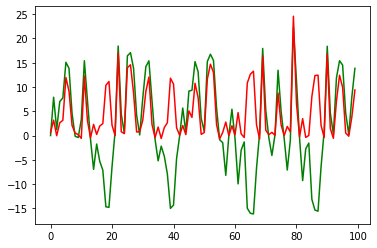

In [ ]:
HiddenState[0]= Init
Observation[0]= Measurement(Init)

for T in range(1,TLen):
  HiddenState[T]=Model(HiddenState[T-1],T)
  Observation[T]=Measurement(HiddenState[T])

plt.plot(HiddenState,'g',Observation,'r')

## **Particle Filter**

In [ ]:
"""
Gaussian function of x with zero mean: 1/(sqrt(2*pi*Var))*exp(- x*x / (2*Var))
"""
def Gaussian(x,var):
  return (1/np.sqrt(2*np.pi*var))*np.exp(-x**2/2*var)


def ParticleFilter (Model, MeasurementDet, Observation, Particles, Time,obsvar):
  """
  Model      : state transition function
  Measurment : function to transfer the model hidden state to the measurement domain
  Observation: obsorvation coming from the measurement
  Particles  : contains N samples from our PDF distribuition
  Time       : Step number
  """

  NumParticles = len(Particles)
  Error = np.zeros_like(Particles)
  Weight = np.zeros(NumParticles)

  """
  Tasks:
     1. Calculate the next state for each particle using the Model function

     2. calaulate the error of each particle : the difference between the observation and the particle
     3. Calculate the weights: the gaussion of the error function
     4. Normalize the weights
     5. calculate a NewSamples with the same number of particles: Having a random sampling using the calculated weights as a probalbility
                     Ps. you can use random.choice numpy function to execute the sampling
     6. calculate the estimation: the average value of the NewlySampled particles.
  """
  #1.st step ,iteration

  #distance calculation

  #weight calculation

  #normlaization

  #Selection - based on Smirnov transformation


  #generation of the estimation, not necessarily a mean
  Estimation = np.mean(Particles)

  return Estimation, Particles

NumParticles = 1000
Particles    = np.random.randn(NumParticles)
Estimation   = np.zeros(TLen)


for i in range(TLen):
  Estimation[i], Particles = ParticleFilter (Model, MeasurementWithoutNoise,Observation[i], Particles,i,ObsVar)

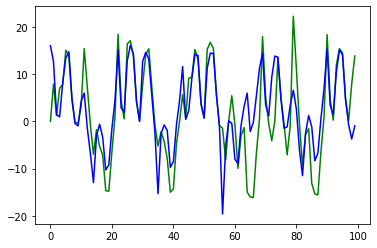

In [ ]:
plt.plot(HiddenState,'g',Estimation,'b')